In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_name_df = pd.read_csv('data/human_activity/features.txt',sep='\s+',header=None, names=['column_index','column_name'])

In [3]:
#피처명 index를 제고하거 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [4]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])if x[1]>0 else x[0], axis=1)
    new_feature_name_Df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [6]:
def get_human_dataset():
    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('data/human_activity/features.txt',sep='\s+',header = None, names=['column_index','column_name'])
    
    #중복된 피처명을 수정하는 get_new_feature_name_df() 를 이용 신규 피처명 DataFrame생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name적용
    X_train = pd.read_csv('data/human_activity/train/X_train.txt',sep='\s+',names = feature_name)
    X_test = pd.read_csv('data/human_activity/test/X_test.txt',sep='\s+',names = feature_name)
    
    #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 aaction으로 부여
    y_train = pd.read_csv('data/human_activity/train/y_train.txt', sep='\s+',header = None, names=['action'])
    y_test = pd.read_csv('data/human_activity/test/y_test.txt',sep='\s+',header = None, names=['action'])
    
    #로드된 학습/테스트용 DataFrame을 모두 변환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [7]:
pd.read_csv('data/human_activity/train/X_train.txt',sep='\s+')

,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7347,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7348,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7349,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
dt_clf = DecisionTreeClassifier(random_state =156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DicisionTreeClassifier의 하이퍼 파라미터 추출
print('DicisionTreeClassifier 기본 하이퍼 파라미터: \n',dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DicisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [11]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [12]:
max_depths = [6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 데이터 세트에서의 예측 성능 측정

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth,accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [13]:
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}

grid_cv = GridSearchCV(dt_clf,param_grid= params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [14]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print("결정 트리 예측 정확도{0:.4f}".format(accuracy))


결정 트리 예측 정확도0.8717


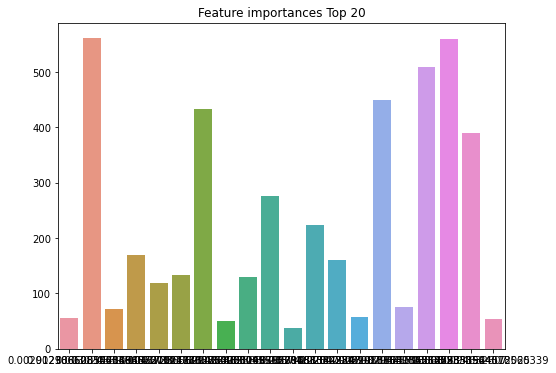

In [15]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

#Top 중요도로 정렬을 쉽게 하고, seaborn의 막대 그래프로 쉽게 표현하기 위해 Seriese 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
#중요도 값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x= ftr_top20, y= ftr_top20.index)
plt.show()

In [16]:
ftr_top20

53     0.253354
390    0.212584
560    0.139001
509    0.115478
75     0.101885
449    0.023971
58     0.020470
160    0.016513
223    0.015741
38     0.009972
276    0.008825
130    0.008550
51     0.006290
433    0.005247
133    0.004373
118    0.003967
170    0.003471
72     0.003025
561    0.002987
55     0.002912
dtype: float64

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns =cancer.feature_names)
#data_df.head(3)

#개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

voting 분류기 정확도: 0.9474


C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
classifiers = [lr_clf,knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred= classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0}정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

LogisticRegression정확도: 0.9386
KNeighborsClassifier정확도: 0.9386


C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

In [21]:
#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train ,X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(y_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

ValueError: X has 1 features, but DecisionTreeClassifier is expecting 561 features as input.

In [ ]:
X_train

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)

gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GRM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time()-start_time))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,50],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose =1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))





In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print('GBM 정확도: {0:.4f}'.foramt(gb_accuracy))


### XGBoost
- 장점
- 예측성능: 일반적으로 분류, 회귀 문제에서 뛰어난 예측 성능을 보임
- GBM대비 빠른 수행 시간: 일반적인 GBM은 순차적으로 가중치를 증감하는 방식으로 학습하기 때문에 느림, 하지만 XGBoost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장
- 과적합 규제: 자체 과적합 규제 기능을 활용하여 과적합을 규제함
- Tree Prunning: 더이상 긍정 이득이 없을시에는 가지치기를 진행하지 않음
- 자체 내장된 교차 검증: 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교파검증을 수행해 최적화된 반복 수행 횟수를 가짐, 지정된 반복횟수가 아니라 교차검증을 통해 평가 데이터 세트의 평가값이 최적화되면 반복을 중간에 멈출 수 있음
- 결손값 자체 처리: XGBoost는 결손값을 자체 처리할 수 있음

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_feature = dataset.data
y_label = dataset.target

In [ ]:
cancer_df = pd.DataFrame(data=X_feature, columns = dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds = 400

In [ ]:
# train 데이터 세트는 'train',evaluation(test)데이터 세트는 'eval'로 명기함
wlist=[(dtrain,'train'),(dtest,'eval')]
#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain,num_boost_round=num_rounds,early_stopping_rounds=100, evals=wlist)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

In [ ]:
#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값을 결정해 리스트 객체인 preds에 저장
preds= [1 if x >0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ',preds[:10])

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score,f1_score

def get_clf_eval(y_test,pred,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    #ROC_AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1:4f}, 재현율:{2:4f}, F1:{3:.4f}, roc_auc{4:.4f}'.format(accuracy, precision, recall,f1,roc_auc))

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
w_pred= xgb_weapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_pred, w_pred_proba)

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
evals=[(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=True)
ws100_preds=xgb_wrapper.predict(X_test)
ws100_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test,ws100_preds,ws100_preds_proba)

In [ ]:
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=evals,verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,ws10_preds,ws10_pred_proba)

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper,ax=ax)

### LightGBM
- XGBoost의 단점을 개선
- 더 빠른 학습시간과 예측 수행 시간 
- 더 작은 메모리 사용량 
- 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)


In [22]:
from lightgbm import LGBMClassifier

In [23]:
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(ftr,target,test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [25]:
get_clf_eval(y_test,preds,pred_proba)

NameError: name 'get_clf_eval' is not defined

In [ ]:
cust_df=pd.read_csv('data/santander/train.csv',encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)

In [ ]:
cust_df

In [ ]:
print(cust_df['TARGET'].value_counts())

In [ ]:
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()

In [ ]:
total_cnt = cust_df.TARGET.count()

In [ ]:
print('unsatisfied 비율은 {0:2f}'.format((unsatisfied_cnt/total_cnt)))

In [ ]:
cust_df.describe()

In [ ]:
#cust_df['var3'].replace(-999999,2,inplace=True)
#cust_df.drop('ID',axis=1,inplace=True)

#피처 세트와 레이블 세트 분리, 레이블 칼럼은 DataFrame의 맨 마지막 에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 shape:{0}, 테스트 세트 shape: {1}'.format(X_train.shape,X_test.shape))
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimator는 500으로, random state는 예제 수행 시마다 동일 예측 결과를위해 설정
#xgb_clf= XGBClassifier(n_estimator=500,random_state=156)

#xgb_clf.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="auc", eval_set=[(X_train,y_train),(X_test,y_test)])
#xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
#print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [ ]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상 시키기 위해 n_estimator를 100으로 감소
xgb_clf = XGBClassifier(n_estimator=100)

params={'max_depth':[5,7],'min_child_weight':[1,3],'colsample_bytree':[0.5,0.75]}

#cv는 3으로 지정
gridcv=GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train,y_train,early_stopping_rounds=30, eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])
print('GridSearchCV 최적 파라미터:',gridcv.best_params_)
xgb_roc_score=roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

In [ ]:
#n_estimator는 1000으로 증가 시키고 learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함
#xgb_clf = XGBClassifier(n_estimator=100)
xgb_clf = XGBClassifier(n_estimator=1000, random_state=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

#성능 평가 지표를 auc로 조기 중단 파라미터 값은 200으로 설정하고 학습 수행
xgb_clf(X_train,y_train,early_stopping_rounds=200, eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)